In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [22]:
"""
loss_dmconstant_d1_multFalse_splitFalse_r1_lr0.001_n3.csv    loss_dmnone_d1_multFalse_splitFalse_r1.0_lr0.001_n5.csv
loss_dmconstant_d5_multFalse_splitFalse_r1.0_lr0.001_n5.csv  loss_dmnone_d1_multFalse_splitFalse_r10.0_lr0.001_n5.csv
loss_dmconstant_d5_multFalse_splitFalse_r10.0_lr0.001_n5.csv loss_dmnone_d1_multFalse_splitFalse_r5.0_lr0.001_n5.csv
loss_dmconstant_d5_multFalse_splitFalse_r5.0_lr0.001_n5.csv  loss_dmnone_d1_multFalse_splitTrue_r1.0_lr0.001_n5.csv
loss_dmconstant_d5_multFalse_splitTrue_r1.0_lr0.001_n5.csv   loss_dmnone_d1_multFalse_splitTrue_r10.0_lr0.001_n5.csv
loss_dmconstant_d5_multFalse_splitTrue_r10.0_lr0.001_n5.csv  loss_dmnone_d1_multFalse_splitTrue_r5.0_lr0.001_n5.csv
loss_dmconstant_d5_multFalse_splitTrue_r5.0_lr0.001_n5.csv   loss_dmnone_d1_multTrue_splitFalse_r1.0_lr0.001_n5.csv
loss_dmconstant_d5_multTrue_splitFalse_r1.0_lr0.001_n5.csv   loss_dmnone_d1_multTrue_splitFalse_r10.0_lr0.001_n5.csv
loss_dmconstant_d5_multTrue_splitFalse_r10.0_lr0.001_n5.csv  loss_dmnone_d1_multTrue_splitFalse_r5.0_lr0.001_n5.csv
loss_dmconstant_d5_multTrue_splitFalse_r5.0_lr0.001_n5.csv   loss_dmnone_d1_multTrue_splitTrue_r1.0_lr0.001_n5.csv
loss_dmconstant_d5_multTrue_splitTrue_r1.0_lr0.001_n5.csv    loss_dmnone_d1_multTrue_splitTrue_r10.0_lr0.001_n5.csv
loss_dmconstant_d5_multTrue_splitTrue_r10.0_lr0.001_n5.csv   loss_dmnone_d1_multTrue_splitTrue_r5.0_lr0.001_n5.csv
loss_dmconstant_d5_multTrue_splitTrue_r5.0_lr0.001_n5.csv
"""
def filename(dm, d, mult, split, r, lr, n):
    return f"data/loss_dm{dm}_d{d}_mult{mult}_split{split}_r{r}_lr{lr}_n{n}.csv"

def baseline(mult, split, r, lr, n):
    return filename(dm="none", d=1, mult=mult, split=split, r=r, lr=lr, n=n)

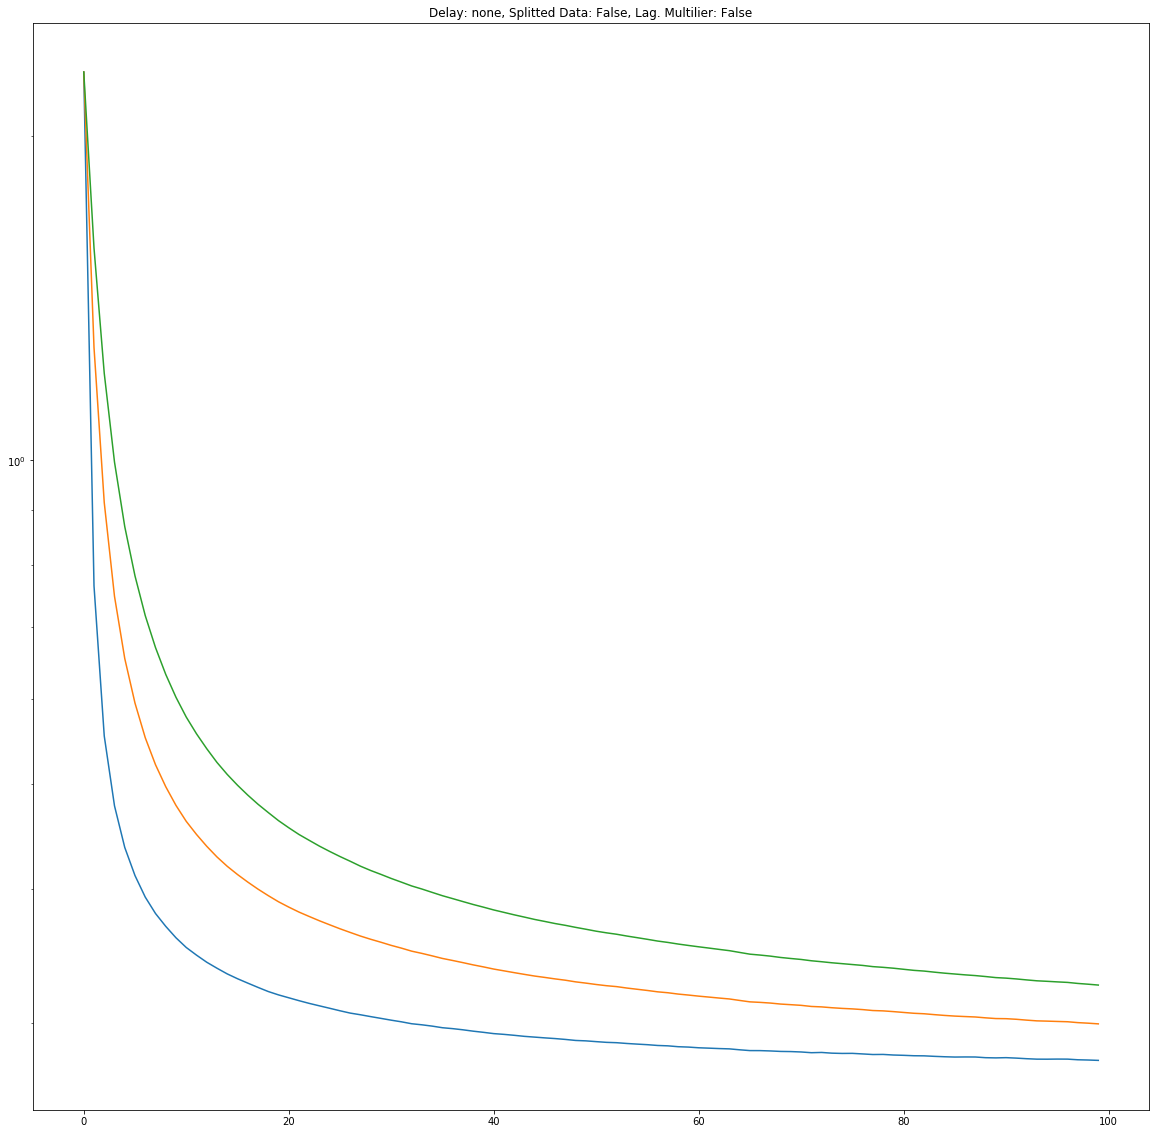

In [14]:
"""
method = 'constant'
delays = [1, 10, 100, 1000, 10000]
lrs = [0.1, 0.01, 0.001, 0.0001]
for delay in delays:
    fig, ax = plt.subplots(1, len(lrs), figsize=(40, 5)) 
    for i, lr in enumerate(lrs):
        filename = getAcc(method, delay, lr)
        data = pd.read_csv(filename, header=None)
        ax[i].set_ylim(top=1) #ymax is your value
        ax[i].set_ylim(bottom=0.8) #ymin is your value
        ax[i].plot(data)
        ax[i].set_title(f"lr: {lr}, delay: {delay}")
    fig.savefig(f"figure_{delay}.pdf", bbox_inches='tight')
"""

n = 5
lr = 0.001
dm = "none"
d = 1
mult = False
split = False
rs = [1.0, 5.0, 10.0]

fig, ax = plt.subplots(1, 1, figsize=(20, 20)) 
ax.set_title(f"Delay: {dm}, Splitted Data: {split}, Lag. Multilier: {mult}")
ax.set_yscale('log')
for r in rs:
    data = pd.read_csv(filename(dm, d, mult, split, r, lr, n), header=None)
    ax.plot(data)

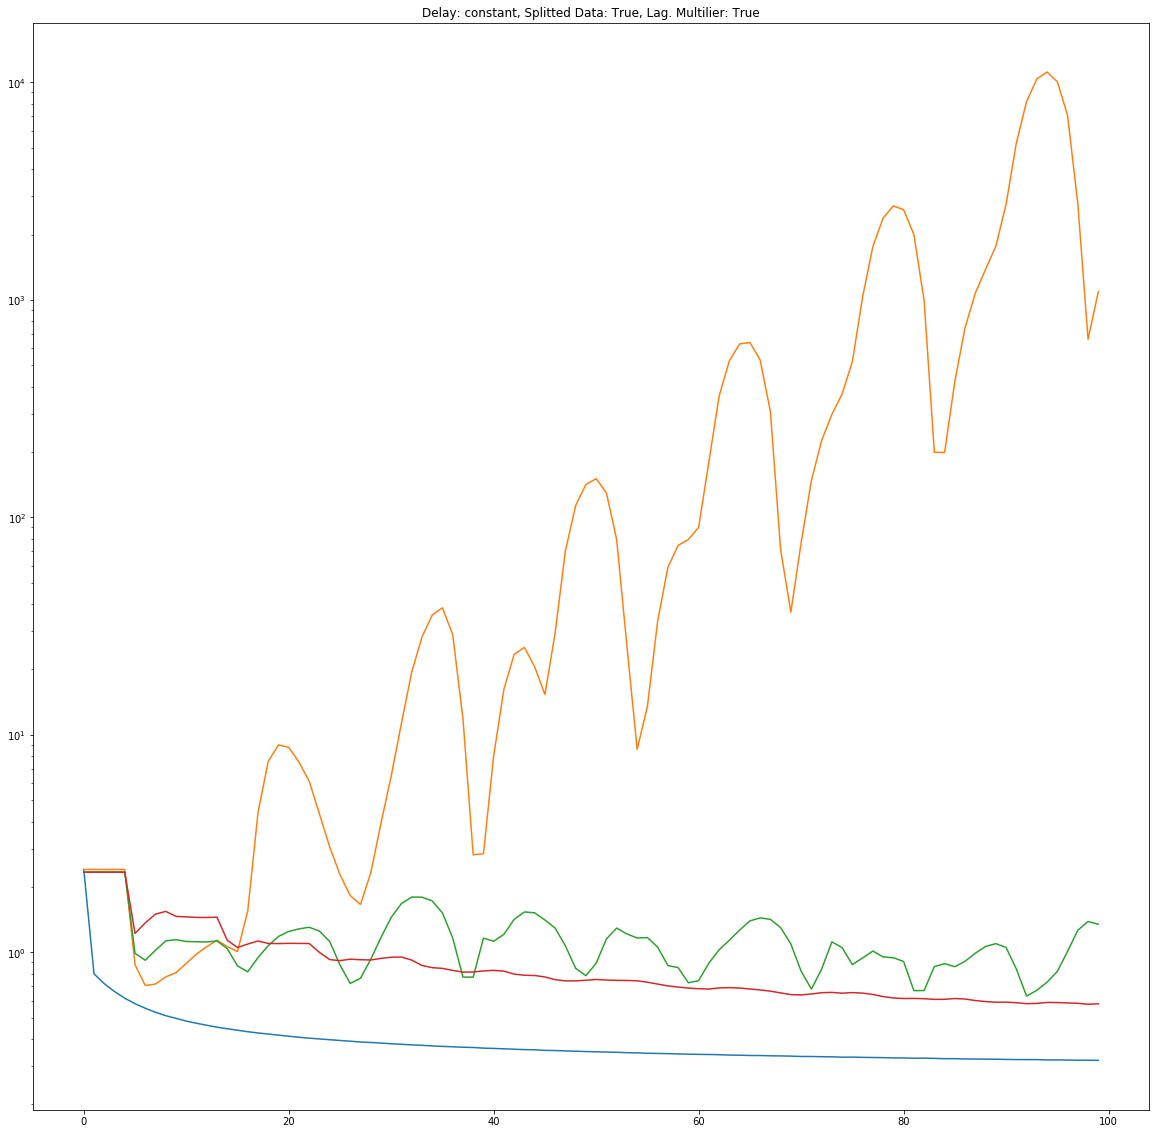

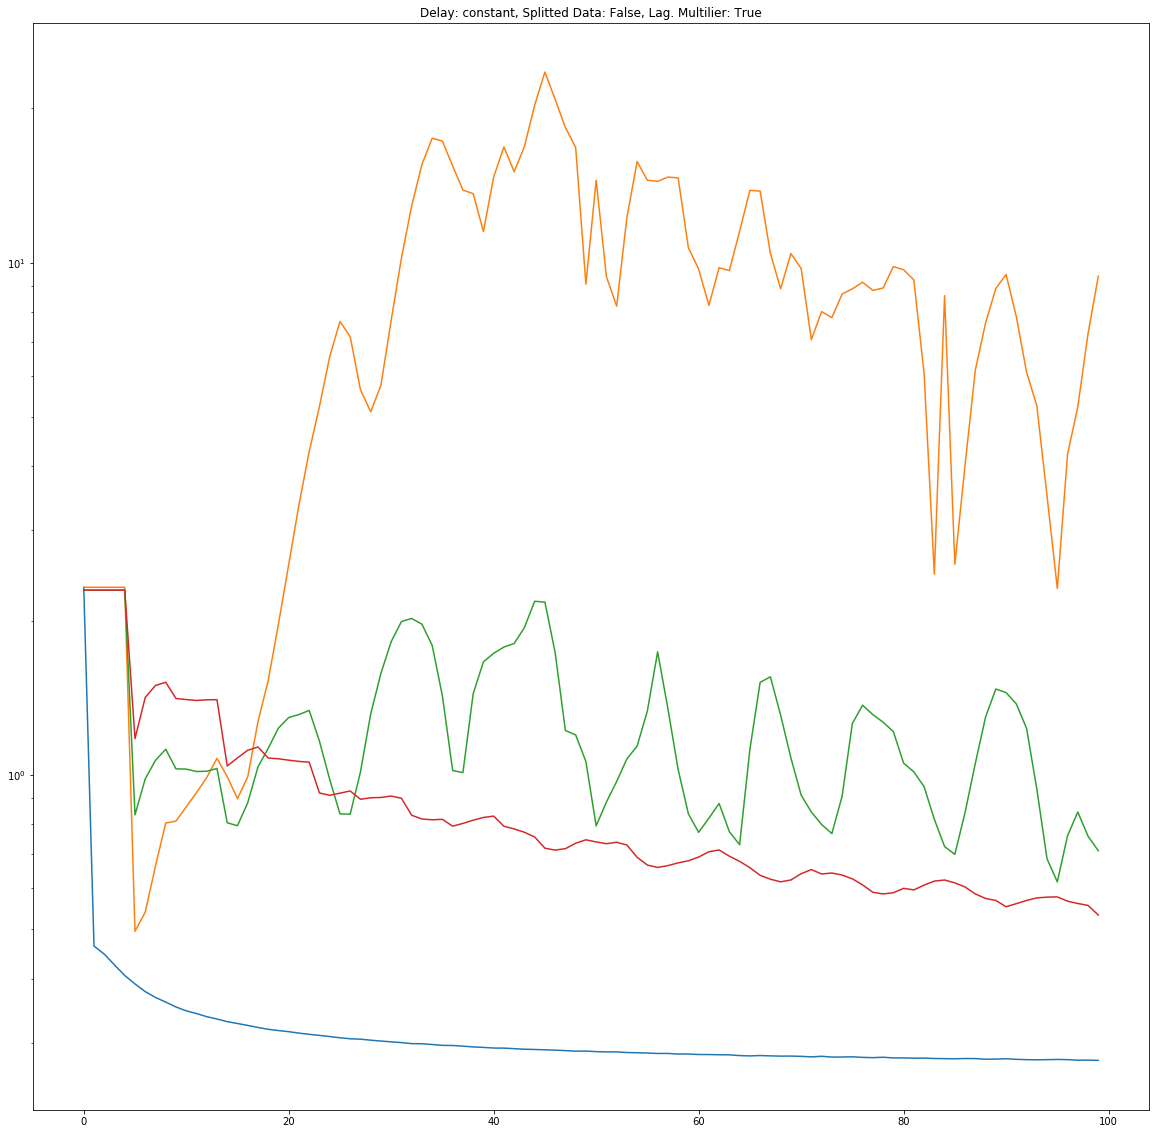

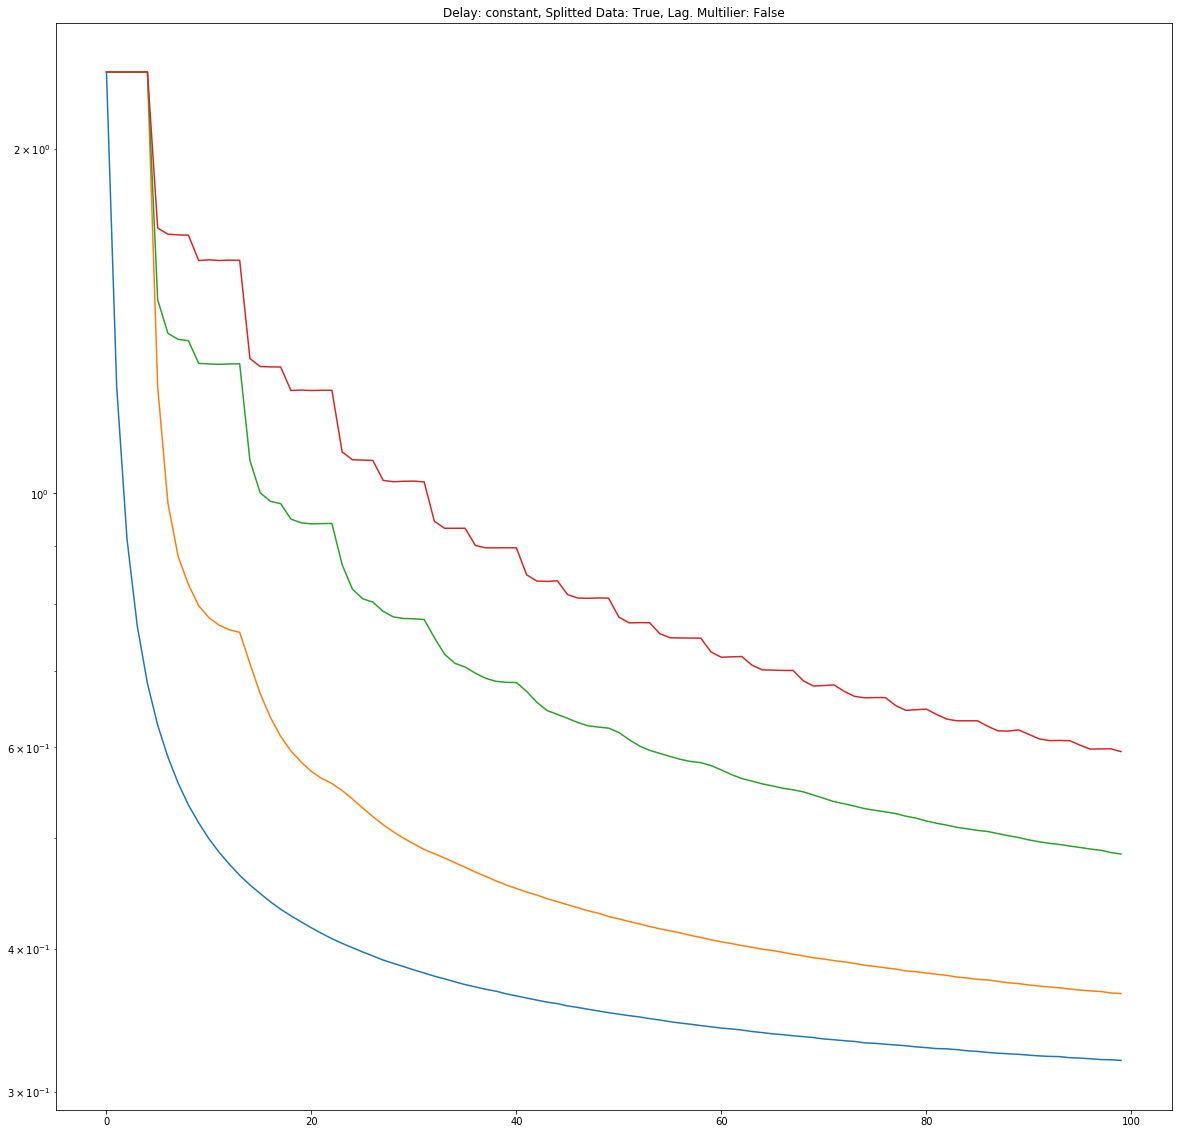

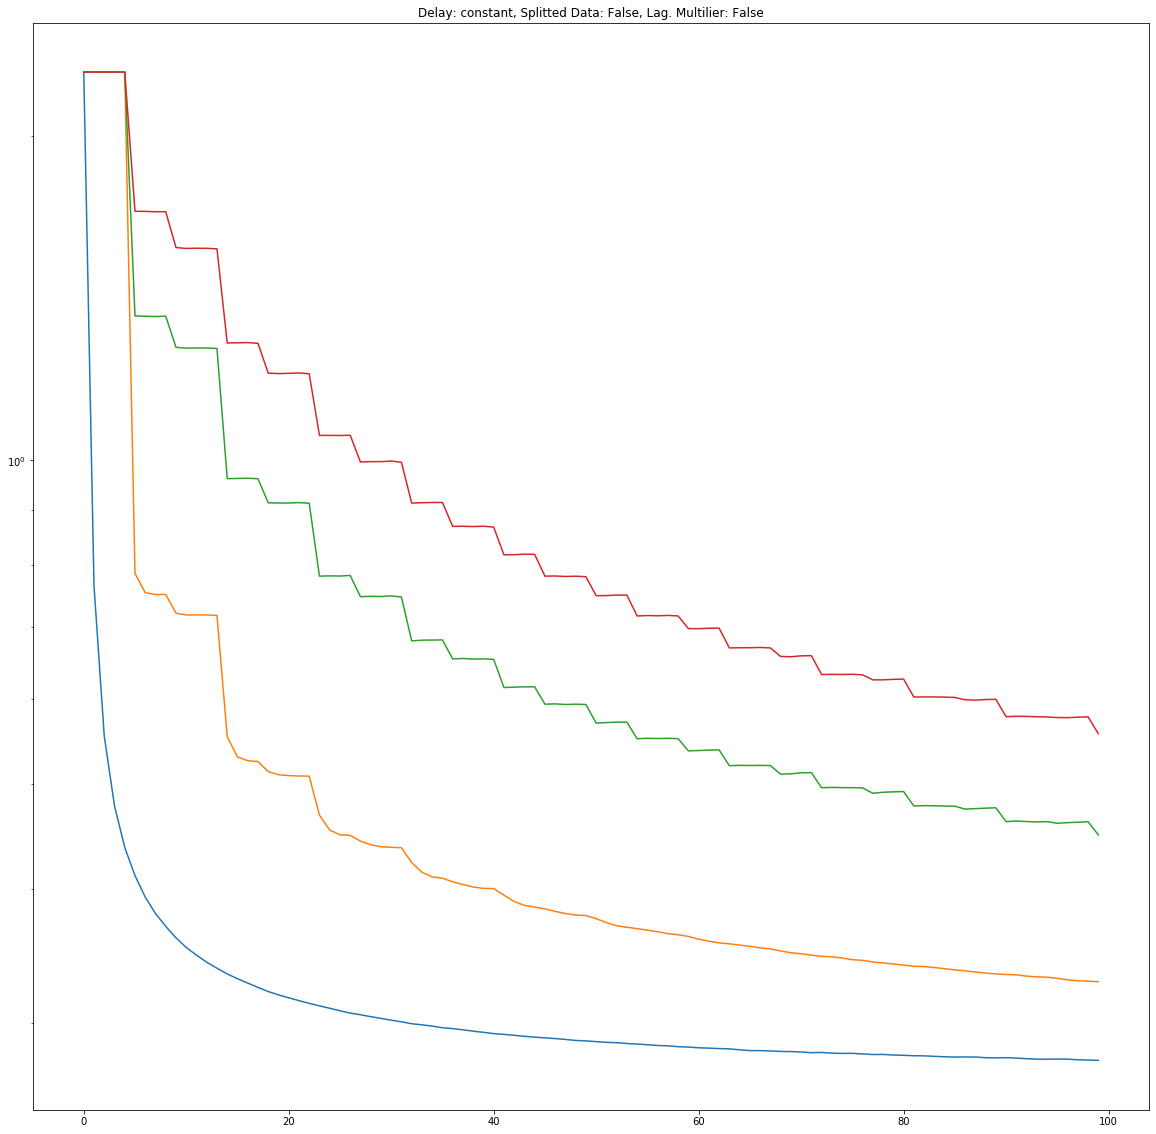

In [28]:
"""
method = 'constant'
delays = [1, 10, 100, 1000, 10000]
lrs = [0.1, 0.01, 0.001, 0.0001]
for delay in delays:
    fig, ax = plt.subplots(1, len(lrs), figsize=(40, 5)) 
    for i, lr in enumerate(lrs):
        filename = getAcc(method, delay, lr)
        data = pd.read_csv(filename, header=None)
        ax[i].set_ylim(top=1) #ymax is your value
        ax[i].set_ylim(bottom=0.8) #ymin is your value
        ax[i].plot(data)
        ax[i].set_title(f"lr: {lr}, delay: {delay}")
    fig.savefig(f"figure_{delay}.pdf", bbox_inches='tight')
"""

n = 5
lr = 0.001
dm = "constant"
d = 5
rs = [1.0, 5.0, 10.0]

mult = True
split = True
fig, ax = plt.subplots(1, 1, figsize=(20, 20)) 
ax.set_title(f"Delay: {dm}, Splitted Data: {split}, Lag. Multilier: {mult}")
ax.set_yscale('log')
baselineData = pd.read_csv(baseline(mult, split, 1.0, lr, n), header=None)
ax.plot(baselineData)
for r in rs:
    data = pd.read_csv(filename(dm, d, mult, split, r, lr, n), header=None)
    ax.plot(data)
    
mult = True
split = False
fig, ax = plt.subplots(1, 1, figsize=(20, 20)) 
ax.set_title(f"Delay: {dm}, Splitted Data: {split}, Lag. Multilier: {mult}")
ax.set_yscale('log')
baselineData = pd.read_csv(baseline(mult, split, 1.0, lr, n), header=None)
ax.plot(baselineData)
for r in rs:
    data = pd.read_csv(filename(dm, d, mult, split, r, lr, n), header=None)
    ax.plot(data)
    
mult = False
split = True
fig, ax = plt.subplots(1, 1, figsize=(20, 20)) 
ax.set_title(f"Delay: {dm}, Splitted Data: {split}, Lag. Multilier: {mult}")
ax.set_yscale('log')
baselineData = pd.read_csv(baseline(mult, split, 1.0, lr, n), header=None)
ax.plot(baselineData)
for r in rs:
    data = pd.read_csv(filename(dm, d, mult, split, r, lr, n), header=None)
    ax.plot(data)
    
mult = False
split = False
fig, ax = plt.subplots(1, 1, figsize=(20, 20)) 
ax.set_title(f"Delay: {dm}, Splitted Data: {split}, Lag. Multilier: {mult}")
ax.set_yscale('log')
baselineData = pd.read_csv(baseline(mult, split, 1.0, lr, n), header=None)
ax.plot(baselineData)
for r in rs:
    data = pd.read_csv(filename(dm, d, mult, split, r, lr, n), header=None)
    ax.plot(data)